# Sorting Arrays

In [2]:
import numpy as np

In [3]:
# Example-1 -> Selection Sort
def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x

x = np.array([2, 1, 4, 3, 5])
print(selection_sort(x))

[1 2 3 4 5]


In [4]:
# Example-2 -> Bogosort
def bogosort(x):
    while np.any(x[:-1] > x[1:]):
        np.random.shuffle(x)
    return x

x = np.array([2, 1, 4, 3, 5])
print(bogosort(x))

[1 2 3 4 5]


# Fast Sorting in Numpy: np.sort and np.argsort

In [12]:
x = np.array([2, 1, 4, 3, 5])

print(np.sort(x))  # Outputs: [1 2 3 4 5]
print(x)           # Outputs: [2 1 4 3 5]  (x is unchanged)

[1 2 3 4 5]
[2 1 4 3 5]


In [13]:
x.sort()           # Sort in-place
print(x)           # Outputs: [1 2 3 4 5]  (x is now sorted)

[1 2 3 4 5]


In [15]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x) # returns the indices of the sorted elements

print(i)
print(x[i])

[1 0 3 2 4]
[1 2 3 4 5]


In [17]:
# Sorting along rows or columns
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [19]:
# Sort each column of x
print(np.sort(X, axis = 0))

[[2 1 4 0 1 5]
 [5 2 5 4 3 7]
 [6 3 7 4 6 7]
 [7 6 7 4 9 9]]


In [20]:
# Sort each rows of x
print(np.sort(X, axis = 1))

[[3 4 6 6 7 9]
 [2 3 4 6 7 7]
 [1 2 4 5 7 7]
 [0 1 4 5 5 9]]


# Partial Sorts: Partitioning

In [25]:
import numpy as np  

x = np.array([7, 2, 3, 1, 6, 5, 4]) 

# Partition the array around the 4th smallest element (index 3)
# The element at index 3 will be the 4th smallest in the array
# All elements before it will be less than or equal to it
# All elements after it will be greater than or equal to it
print(np.partition(x, 3)) 

[2 1 3 4 6 5 7]


In [24]:
# We can partition along an arbitrary axis of n-D array also
print(np.partition(X, 3, axis = 1))

[[3 4 6 6 7 9]
 [2 3 4 6 7 7]
 [2 1 4 5 7 7]
 [0 4 1 5 9 5]]


# Example: k-Nearest Neighbors

In [29]:
X = rand.rand(10, 2)

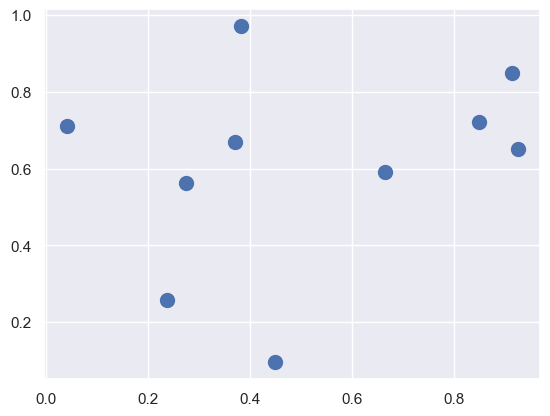

In [30]:
import matplotlib.pyplot as plt
import seaborn 
seaborn.set() # Plot Styling
plt.scatter(X[:, 0], X[:, 1], s = 100)
plt.show()

In [31]:
dist_sq = np.sum((X[:, np.newaxis,:] - X[np.newaxis,:,:]) ** 2, axis = 1)
print(dist_sq)

[[2.59096901 0.62769159]
 [2.49806482 1.19572563]
 [0.9045168  3.23448654]
 [1.0632109  0.64622004]
 [1.10645558 0.61169549]
 [1.42505878 0.63065228]
 [1.03071845 1.93323076]
 [2.00814533 0.73875049]
 [1.62315135 1.84617831]
 [3.08131515 0.71476066]]


In [32]:
# for each pair of points, compute differences in their coordinates
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
print(differences.shape)

(10, 10, 2)


In [33]:
# square the coordinate differences
sq_differences = differences ** 2
print(sq_differences.shape)

(10, 10, 2)


In [34]:
# sum the coordinate differences to get the squared differences
dist_sq = sq_differences.sum(-1)
print(dist_sq.shape)

(10, 10)


In [35]:
# diagonal of the matrix
print(dist_sq.diagonal())

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [36]:
nearest = np.argsort(dist_sq, axis = 1)
print(nearest)

[[0 7 1 4 3 6 5 2 8 9]
 [1 7 0 4 6 3 5 9 2 8]
 [2 8 5 4 3 0 9 7 6 1]
 [3 5 6 4 9 8 7 0 1 2]
 [4 7 0 3 1 5 6 2 8 9]
 [5 3 9 8 4 6 2 7 0 1]
 [6 3 5 9 4 7 1 0 8 2]
 [7 0 1 4 3 6 5 2 8 9]
 [8 2 5 3 9 4 6 7 0 1]
 [9 5 3 6 8 4 2 7 1 0]]


In [37]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis = 1)
print(nearest_partition)

[[1 0 7 4 3 5 6 2 8 9]
 [1 0 7 4 3 5 6 2 8 9]
 [2 8 5 4 3 0 6 7 1 9]
 [3 5 6 4 9 1 2 7 8 0]
 [7 4 0 3 1 5 6 2 8 9]
 [5 3 9 8 4 1 6 7 2 0]
 [6 3 5 9 4 1 2 7 8 0]
 [1 0 7 4 3 5 6 2 8 9]
 [8 2 5 3 9 4 6 7 1 0]
 [3 5 9 6 8 4 1 7 2 0]]


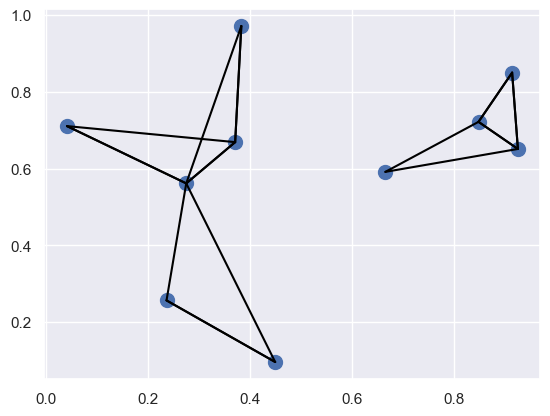

In [40]:
plt.scatter(X[:, 0], X[:, 1], s = 100)

# draw lines from each point to its two nearest neighbors
K = 2

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K + 1]:
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen:
        plt.plot(*zip(X[j], X[i]), color = "black")
plt.show()